# 🚀 **Day 12: Building a Real-Time Data Dashboard with API Integration**

### 🎯 **Goal:**

To build a **simple real-time dashboard** using an API that updates live data (like weather, currency, or public transport). You'll integrate API → clean it → visualize using a dashboard interface (via Streamlit or basic matplotlib/seaborn).

---

### 🔍 Topic: **Weather Data Dashboard using OpenWeatherMap API**

1. **Fetch live weather** data using city input.
2. Extract and clean JSON fields (temperature, weather condition, humidity, etc.).
3. Visualize the data — **line plot, gauge, bar** or similar.
4. Optional: Wrap into a **Streamlit dashboard** (if confident).

---

In [1]:
import requests
import json
import os 
from dotenv import load_dotenv


api_key = os.getenv('OPEN_WEATHER_API_KEY')
url = 'https://api.openweathermap.org/data/2.5/weather'

data = {}
cities = ['Delhi','Mumbai', 'Kolkata', 'London', 'Tokyo', 'New York']

for city in cities:
    params = {
        'appid' : api_key,
        'units' : 'Metric',
        'q' : city
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data[city] = response.json() 
    else:
        data[city] = {'error': response.status_code}

print(json.dumps(data, indent=2))

{
  "Delhi": {
    "coord": {
      "lon": 77.2167,
      "lat": 28.6667
    },
    "weather": [
      {
        "id": 500,
        "main": "Rain",
        "description": "light rain",
        "icon": "10d"
      }
    ],
    "base": "stations",
    "main": {
      "temp": 30.22,
      "feels_like": 35.08,
      "temp_min": 30.22,
      "temp_max": 30.22,
      "pressure": 998,
      "humidity": 68,
      "sea_level": 998,
      "grnd_level": 974
    },
    "visibility": 10000,
    "wind": {
      "speed": 2.91,
      "deg": 106,
      "gust": 2.85
    },
    "rain": {
      "1h": 0.1
    },
    "clouds": {
      "all": 98
    },
    "dt": 1753953518,
    "sys": {
      "country": "IN",
      "sunrise": 1753920707,
      "sunset": 1753969387
    },
    "timezone": 19800,
    "id": 1273294,
    "name": "Delhi",
    "cod": 200
  },
  "Mumbai": {
    "coord": {
      "lon": 72.8479,
      "lat": 19.0144
    },
    "weather": [
      {
        "id": 801,
        "main": "Clouds",
        "

In [2]:
data['Delhi']['main']['temp']
data['Delhi']['main']['humidity']
data['Delhi']['weather'][0]['main']
data['Delhi']['wind']['speed']

2.91

In [3]:
data[cities[0]]

{'coord': {'lon': 77.2167, 'lat': 28.6667},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 30.22,
  'feels_like': 35.08,
  'temp_min': 30.22,
  'temp_max': 30.22,
  'pressure': 998,
  'humidity': 68,
  'sea_level': 998,
  'grnd_level': 974},
 'visibility': 10000,
 'wind': {'speed': 2.91, 'deg': 106, 'gust': 2.85},
 'rain': {'1h': 0.1},
 'clouds': {'all': 98},
 'dt': 1753953518,
 'sys': {'country': 'IN', 'sunrise': 1753920707, 'sunset': 1753969387},
 'timezone': 19800,
 'id': 1273294,
 'name': 'Delhi',
 'cod': 200}

In [4]:
import pandas as pd 

weather_data = []

for city in cities:
    try:
        info = data[city]
        weather_data.append({
            'City' : city,
            'Temperature' : info['main']['temp'],
            'Humidity' : info['main']['humidity'],
            'Weather' : info['weather'][0]['main'],
            'Wind Speed' : info['wind']['speed']
        })
    except KeyError:
        weather_data.append({
            'City' : city,
            'Temperature' : None,
            'Humidity' : None,
            'Weather' : None,
            'Wind Speed' : None
        })
        
weather_df = pd.DataFrame(weather_data)

weather_df.head()

,City,Temperature,Humidity,Weather,Wind Speed
0,Delhi,30.22,68,Rain,2.91
1,Mumbai,28.19,80,Clouds,8.19
2,Kolkata,31.31,87,Clouds,4.46
3,London,19.08,88,Clouds,3.12
4,Tokyo,29.71,51,Clear,7.58


In [7]:
weather_data

[{'City': 'Delhi',
  'Temperature': 30.22,
  'Humidity': 68,
  'Weather': 'Rain',
  'Wind Speed': 2.91},
 {'City': 'Mumbai',
  'Temperature': 28.19,
  'Humidity': 80,
  'Weather': 'Clouds',
  'Wind Speed': 8.19},
 {'City': 'Kolkata',
  'Temperature': 31.31,
  'Humidity': 87,
  'Weather': 'Clouds',
  'Wind Speed': 4.46},
 {'City': 'London',
  'Temperature': 19.08,
  'Humidity': 88,
  'Weather': 'Clouds',
  'Wind Speed': 3.12},
 {'City': 'Tokyo',
  'Temperature': 29.71,
  'Humidity': 51,
  'Weather': 'Clear',
  'Wind Speed': 7.58},
 {'City': 'New York',
  'Temperature': 23.7,
  'Humidity': 86,
  'Weather': 'Clouds',
  'Wind Speed': 1.69}]

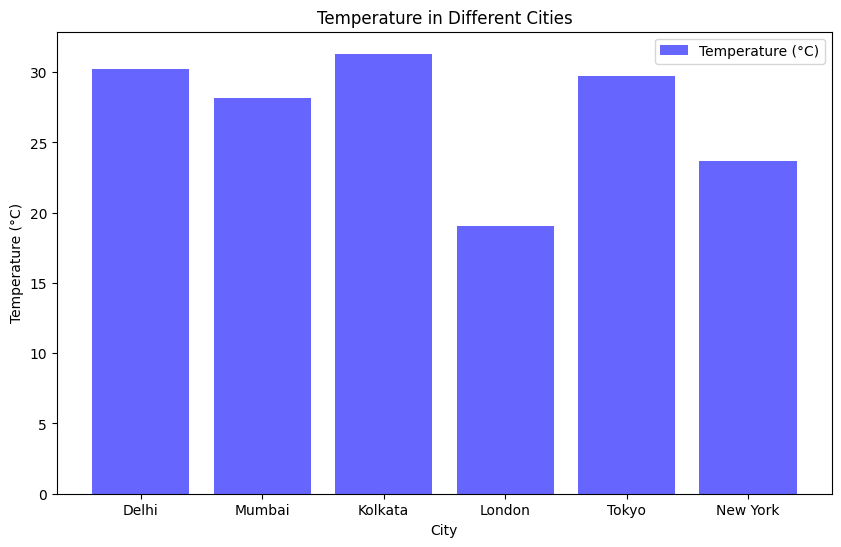

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(weather_df['City'], weather_df['Temperature'], color='blue', alpha=0.6, label='Temperature (°C)')
plt.xlabel('City')
plt.ylabel('Temperature (°C)') 
plt.title('Temperature in Different Cities')
plt.legend()
plt.show()

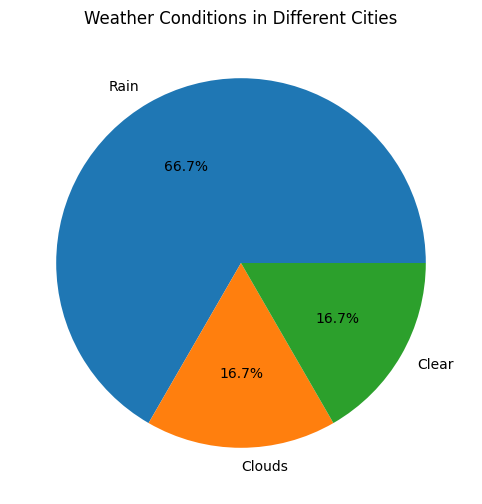

In [6]:
plt.figure(figsize=(10, 6))
plt.pie(weather_df['Weather'].value_counts(), labels=weather_df['Weather'].unique(), autopct='%1.1f%%')
plt.title('Weather Conditions in Different Cities')
plt.show()
